## Outlier

- An outlier is an observation of a data point that lies an abnormal distance from other values in a given population.

- An outlier is an object(s) that deviates significantly from the rest of the object collection.

- It is an abnormal observation during the Data Analysis stage, that data point lies far away from other values.

### Handling outliers

- Outliers can either be a mistake or just variance.

- If we found this is due to a mistake, then we can ignore them.

- If we found this is due to variance, in the data, we can work on this.

### Possibilities for an Outlier!

- Incorrect data entry or error during data processing
- Missing values in a dataset.
- Data did not come from the intended sample.
- Errors occur during experiments.
- Not an errored, it would be unusual from the original.
- Extreme distribution than normal.

### Effect of outliers on EDA

- Affects numerical measures
- Affects correlation


### Drop outliers or not

- Before dropping the Outliers, we must analyze the dataset with and without outliers and understand better the impact of the results.
- If you observed that it is obvious due to incorrectly entered or measured, certainly you can drop the outlier. No issues on that case.
- If you find that your assumptions are getting affected, you may drop the outlier straight away, provided that no changes in the results.
- If the outlier affects your assumptions and results. No questions simply drop the outlier and proceed with your further steps.

### Finding outliers

In [ ]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
diabetes = pd.read_csv('diabetes.csv') 

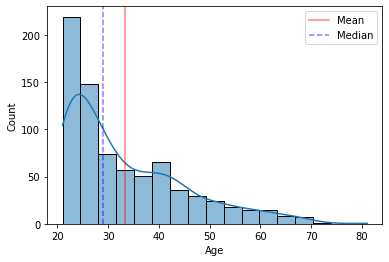

In [ ]:
sns.histplot(data = diabetes['Age'], kde = True)
plt.axvline(x=diabetes.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

<AxesSubplot:ylabel='Age'>

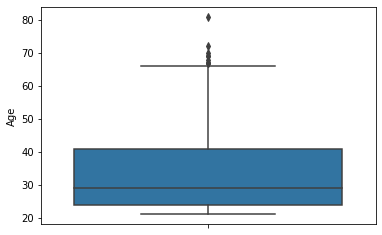

In [ ]:
sns.boxplot(y=diabetes['Age'])

### Approaches can be used

- outlier replacements using computed mean. 
- outlier replacements using computed median. 
- outlier replacements using grouped mean, if classification approach. 
- outlier replacements using grouped median if classification approach. 
- outlier removal or the filling of missing values (Z score and/or IQR)

**Z score**

- Basically calculating standard normal distribution.
- describes any data point by finding their relationship between mean and standard deviation of the group of data points.
- It finds the distribution of data where mean is 0 and standard deviation is 1.
- if Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outlier.

In [ ]:
z = np.abs(stats.zscore(diabetes['Age']))
print(z)

0      1.425995
1      0.190672
2      0.105584
3      1.041549
4      0.020496
         ...   
763    2.532136
764    0.531023
765    0.275760
766    1.170732
767    0.871374
Name: Age, Length: 768, dtype: float64


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([123, 453, 459, 666, 684], dtype=int64),)


In [ ]:
threshold = -3
print(np.where(z < -3))

(array([], dtype=int64),)


**IQR Score**

- data has been divided into quartiles (Q1, Q2, and Q3).
    - 25th percentile of the data – Q1
    - 50th percentile of the data – Q2 (Median)
    - 75th percentile of the data – Q3
    - lower limit for outliers are Q1 - 1.5 * IQR
    - upper limit for outliers are Q3 + 1.5 * IQR

In [ ]:
Q1 = np.percentile(diabetes['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(diabetes['Age'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(diabetes['Age'], 75, interpolation = 'midpoint')

17.0


In [ ]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in diabetes['Age']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 17.0
low_limit is -1.5
up_limit is 66.5
 outlier in the dataset is [69, 67, 72, 81, 67, 67, 70, 68, 69]
